In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [20]:
df = pd.read_csv("customer_support_tickets.csv")

In [21]:
print("🔹 First 5 Rows of Dataset:")
print(df.head())

🔹 First 5 Rows of Dataset:
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup 

In [22]:
print("\n🔹 Dataset Info:")
print(df.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null  

In [23]:
print("\n🔹 Missing Values:")
print(df.isnull().sum())


🔹 Missing Values:
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


In [24]:
df_clean = df.dropna(subset=[
    'Ticket Description',
    'Ticket Type',
    'First Response Time',
    'Time to Resolution',
    'Customer Satisfaction Rating'
])

In [25]:
print(f"\n✅ Remaining rows after cleaning: {df_clean.shape[0]}")


✅ Remaining rows after cleaning: 2769


In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<ipython-input-27-a06bc6c1bde8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Ticket Type', order=df_clean['Ticket Type'].value_counts().index, palette="Set2")


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Refund request'),
  Text(1, 0, 'Technical issue'),
  Text(2, 0, 'Billing inquiry'),
  Text(3, 0, 'Product inquiry'),
  Text(4, 0, 'Cancellation request')])

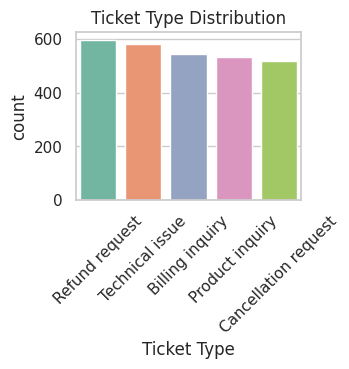

In [27]:
plt.subplot(2, 2, 1)
sns.countplot(data=df_clean, x='Ticket Type', order=df_clean['Ticket Type'].value_counts().index, palette="Set2")
plt.title('Ticket Type Distribution')
plt.xticks(rotation=45)

<ipython-input-28-4c70e2133cd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Ticket Channel', order=df_clean['Ticket Channel'].value_counts().index, palette="Set3")


([0, 1, 2, 3],
 [Text(0, 0, 'Email'),
  Text(1, 0, 'Phone'),
  Text(2, 0, 'Social media'),
  Text(3, 0, 'Chat')])

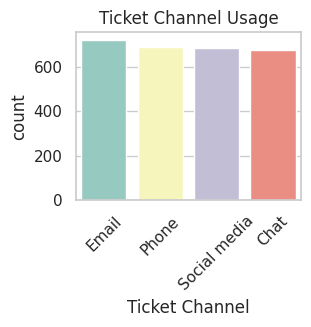

In [28]:
plt.subplot(2, 2, 2)
sns.countplot(data=df_clean, x='Ticket Channel', order=df_clean['Ticket Channel'].value_counts().index, palette="Set3")
plt.title('Ticket Channel Usage')
plt.xticks(rotation=45)

<ipython-input-29-2650a06bf820>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Ticket Priority', order=df_clean['Ticket Priority'].value_counts().index, palette="Set1")


([0, 1, 2, 3],
 [Text(0, 0, 'Critical'),
  Text(1, 0, 'High'),
  Text(2, 0, 'Medium'),
  Text(3, 0, 'Low')])

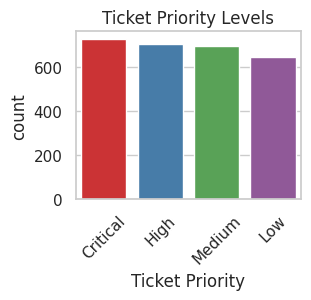

In [29]:
plt.subplot(2, 2, 3)
sns.countplot(data=df_clean, x='Ticket Priority', order=df_clean['Ticket Priority'].value_counts().index, palette="Set1")
plt.title('Ticket Priority Levels')
plt.xticks(rotation=45)

<ipython-input-30-44626bceb3c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='Customer Gender', palette="pastel")


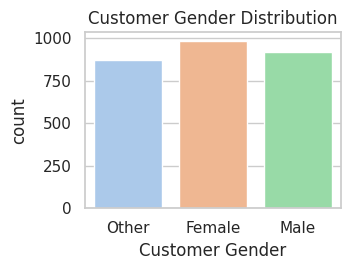

In [30]:
plt.subplot(2, 2, 4)
sns.countplot(data=df_clean, x='Customer Gender', palette="pastel")
plt.title('Customer Gender Distribution')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [31]:
text = " ".join(desc for desc in df_clean['Ticket Description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

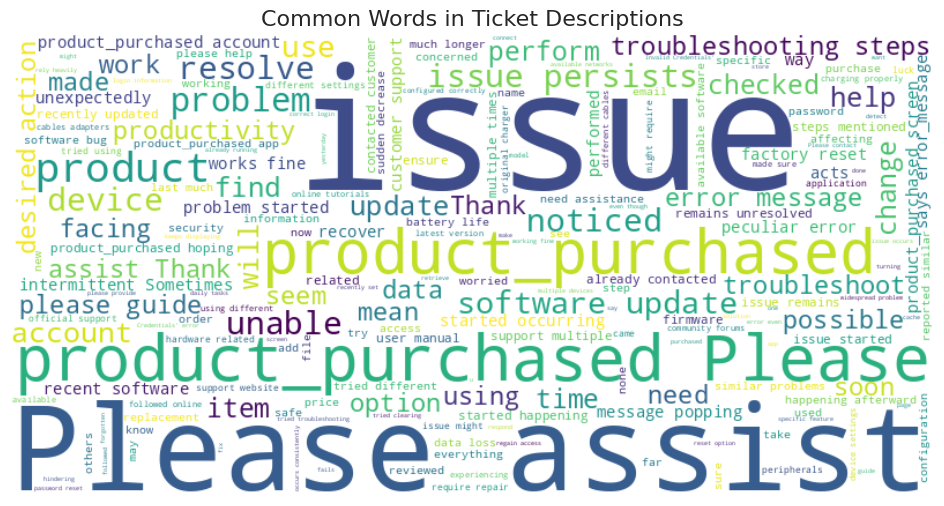

In [32]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Ticket Descriptions", fontsize=16)
plt.show()

In [33]:
le = LabelEncoder()
df_clean['Ticket Type Encoded'] = le.fit_transform(df_clean['Ticket Type'])

<ipython-input-33-c5caac4bdcf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Ticket Type Encoded'] = le.fit_transform(df_clean['Ticket Type'])


In [34]:
X = df_clean['Ticket Description']
y = df_clean['Ticket Type Encoded']

In [35]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [37]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_pred = clf.predict(X_test)

In [39]:
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


📊 Classification Report:

                      precision    recall  f1-score   support

     Billing inquiry       0.29      0.20      0.23       123
Cancellation request       0.18      0.16      0.17        96
     Product inquiry       0.18      0.17      0.17       102
      Refund request       0.26      0.30      0.27       122
     Technical issue       0.25      0.33      0.28       111

            accuracy                           0.23       554
           macro avg       0.23      0.23      0.23       554
        weighted avg       0.23      0.23      0.23       554



In [40]:
print("📊 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

📊 Confusion Matrix:

[[24 15 26 29 29]
 [10 15 14 25 32]
 [16 15 17 31 23]
 [16 15 26 36 29]
 [17 24 13 20 37]]
